In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import json

In [8]:
def plot_graph(aff_df, df_name):
    names = {
        'beer': 'beer',
        'compas-scores-two-years': 'compas',
        'breast': 'breast',
        'pima': 'pima',
        'heloc_dataset_v1':'heloc'
    }

    fig, ax = plt.subplots()
    ax.set_title(names[df_name])
    fig.subplots_adjust(right=0.75)
    p1, = ax.plot(aff_df['lambda'], aff_df['nr_fact'], "b-", label="nr_fact")
    ax.set_xlabel("lambda")
    ax.set_ylabel("nr_fact")
    ax2 = ax.twinx()
    ax3 = ax.twinx()
    p2, = ax2.plot(aff_df['lambda'], aff_df['length'], "r-", label="length")
    ax2.set_ylabel("length")
    # ax2.set_ylim([1.01,1.16])

    p3, = ax3.plot(aff_df['lambda'], aff_df['q_multiple'], "g-", label="q_multiple")
    ax3.set_ylabel("q_multiple")
    # ax3.set_ylim([0.0,0.15])
    ax3.spines.right.set_position(("axes", 1.2))

    ax.yaxis.label.set_color(p1.get_color())
    ax2.yaxis.label.set_color(p2.get_color())
    ax3.yaxis.label.set_color(p3.get_color())

    tkw = dict(size=4, width=1.5)
    ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
    ax2.tick_params(axis='y', colors=p2.get_color(), **tkw)
    ax3.tick_params(axis='y', colors=p3.get_color(), **tkw)
    ax.tick_params(axis='x', **tkw)
    ax.axvline(x=0.1, linestyle='--')


    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                    box.width, box.height * 0.9])

    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fancybox=True, shadow=True, handles=[p1, p2, p3])
    plt.savefig(f'./img/robust_second_{df_name}.png')

In [9]:
def plot_graph_multi(aff_df, df_name, df_plot):
    fig = plt.figure()
    ax = Axes3D(fig)

    ax.plot_trisurf(aff_df['lambda'], aff_df['beta'], aff_df[df_plot], label=df_plot)
    if df_plot == 'nr_fact':
        ax.plot_trisurf(aff_df['lambda'], aff_df['beta'], aff_df['nr_rule'], alpha=0.6)
        ax.azim = 45
    else:
        ax.azim = -45

    ax.set_xlabel('lambda')
    ax.set_ylabel('beta')
    ax.zaxis.set_rotate_label(False) 
    ax.set_zlabel(df_plot, rotation=90)
    # plt.savefig(f'./img/robust_{df_plot}_sum_{df_name}.png')

    plt.show()


In [10]:
def process_df(df):
    ndf = df.copy()
    ndf.kwargs = ndf.kwargs.str.replace("'", '"').apply(json.loads)
    ndf['lambda'] = ndf.kwargs.apply(lambda a: a['lam'])
    ndf = ndf.loc[ndf.kwargs.str.len() == 1]
    return ndf

In [11]:
ALL_DATASETS = ['beer', 'breast', 'pima', 'compas-scores-two-years', 'heloc_dataset_v1']
ALL_PLOTS = ['nr_fact', 'length', 'q_multiple']

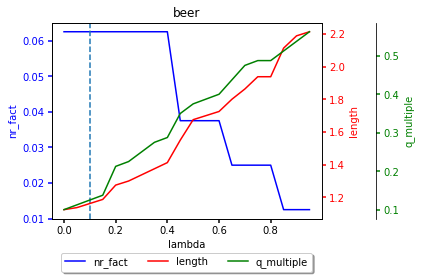

In [12]:
for ds in ALL_DATASETS:
    df = pd.read_csv(f'./lambda_beta_study/{ds}.csv', sep=';')
    ndf = process_df(df)
    plot_graph(ndf, ds)

In [13]:
def process_multi_df(df):
    ndf = df.copy()
    ndf.kwargs = ndf.kwargs.str.replace("'", '"').apply(json.loads)
    ndf['lambda'] = ndf.kwargs.apply(lambda a: a['lam'])
    ndf = ndf.loc[ndf.kwargs.str.len() == 2]
    ndf['beta'] = ndf.kwargs.apply(lambda a: a['beta'])
    ndf['nr_rule'] = ndf.nr_fact.max()
    return ndf

C:\Users\Guille\AppData\Local\Temp\ipykernel_3044\2738185137.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


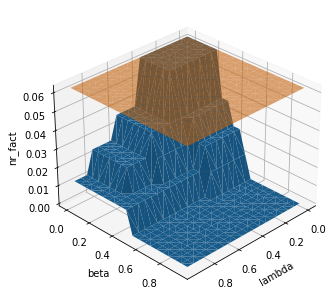

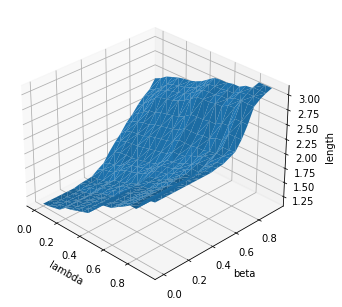

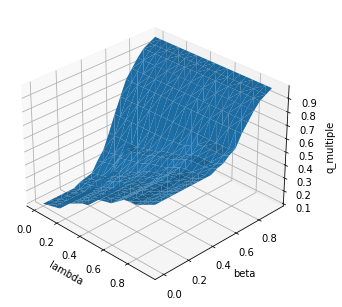

In [16]:
for ds in ALL_DATASETS:
    for plot in ALL_PLOTS:
        df = pd.read_csv(f'./lambda_beta_study/{ds}.csv', sep=';')
        ndf = process_multi_df(df)
        plot_graph_multi(ndf, ds, plot)